In [1]:
#importing libraries
import numpy as np
import pandas as pd
import glob
import warnings
warnings.filterwarnings('ignore')

# PART-1: GDP ANALYSIS OF THE INDIAN STATES

## PART 1-A

#### Reading and Cleaning

In [2]:
data1_a = pd.read_csv(r"D:\Data science\GDP Assgmnt\Part1A\ab40c054-5031-4376-b52e-9813e776f65e.csv")

data1_a = data1_a.dropna(axis = 0, thresh = data1_a.shape[1]/2)    #deleting rows with more than 50% of NaN values_
data1_a = data1_a.dropna(axis=1, thresh = data1_a.shape[0]/2)      #deleting columns with more than 50% of NaN values
data1_a = data1_a.drop(columns=['Puducherry', 'Delhi', 'Chandigarh', 'Andaman & Nicobar Islands'])
data1_a.shape

(9, 31)

In [3]:
#filling NA values with 0s
data1_a = data1_a.fillna(0,axis=1)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#converting dataframe into list
statescol = list(data1_a)

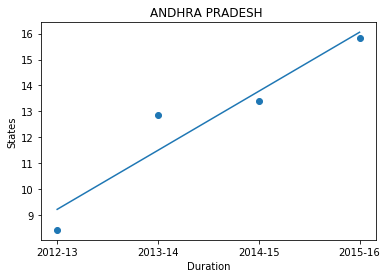

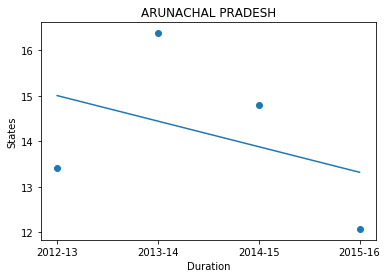

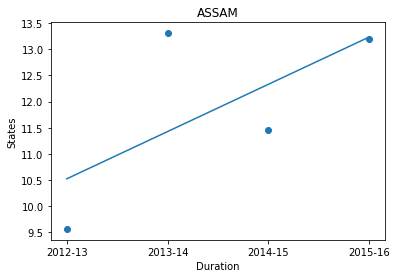

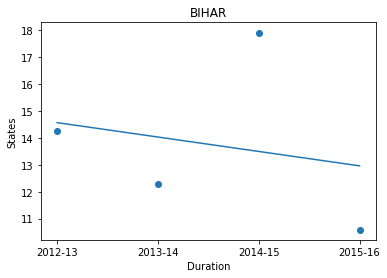

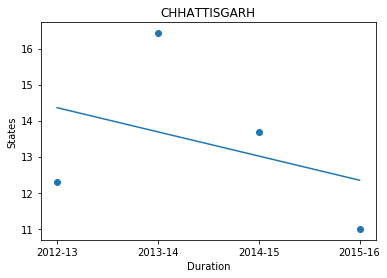

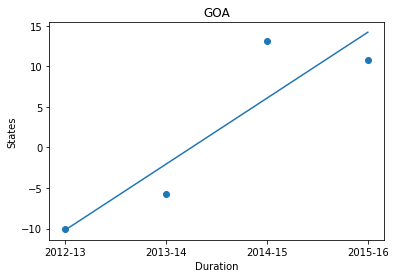

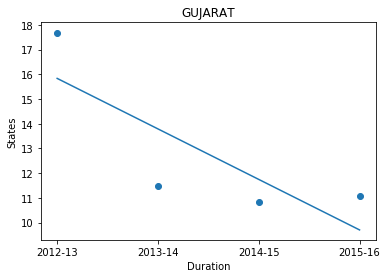

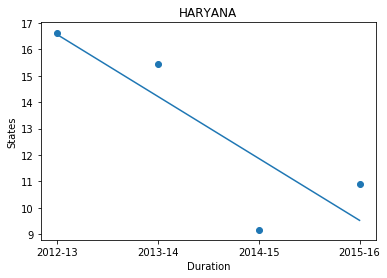

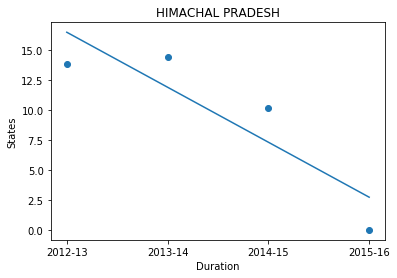

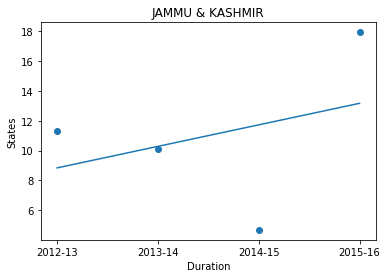

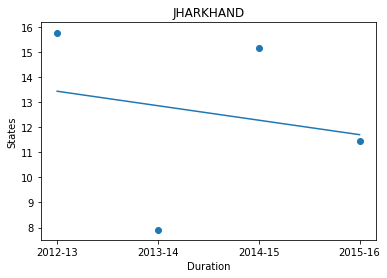

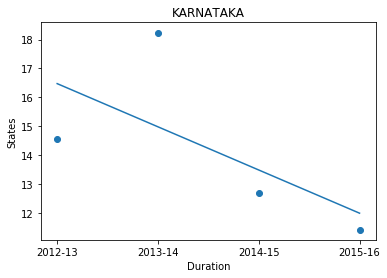

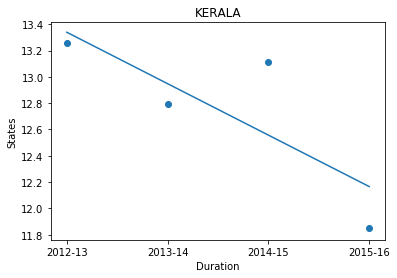

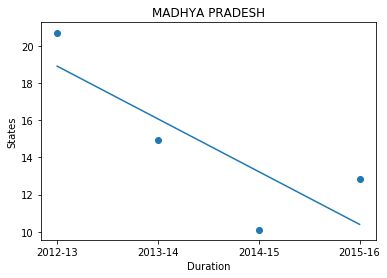

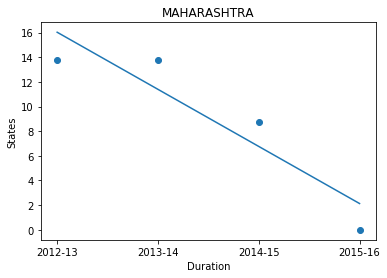

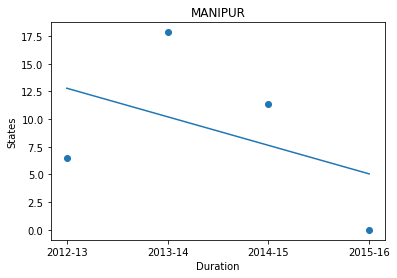

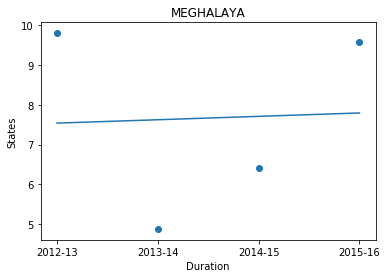

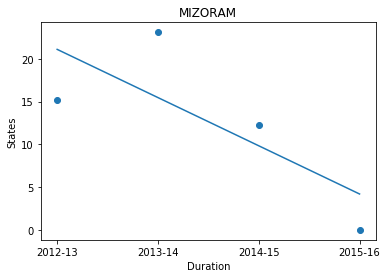

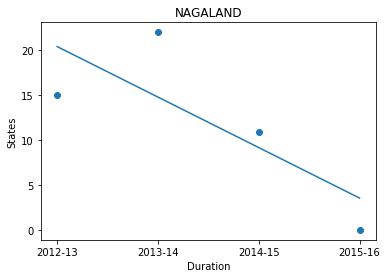

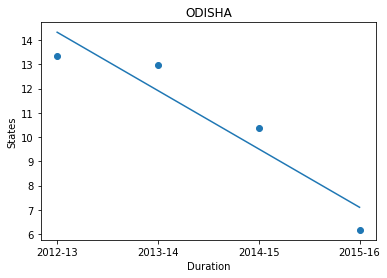

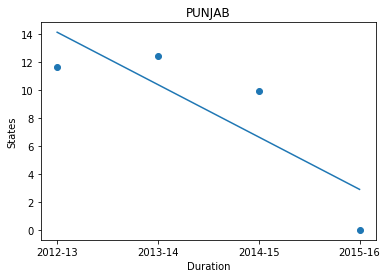

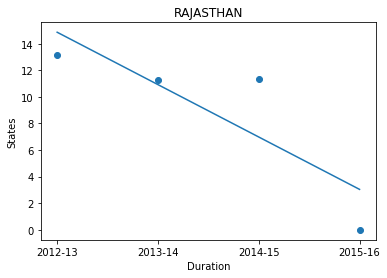

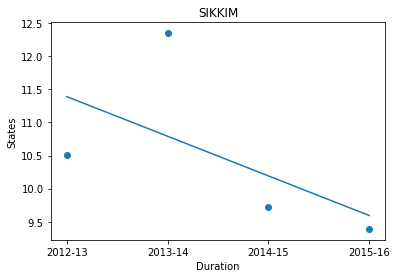

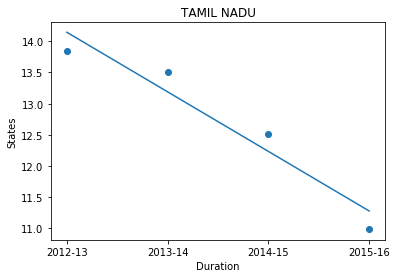

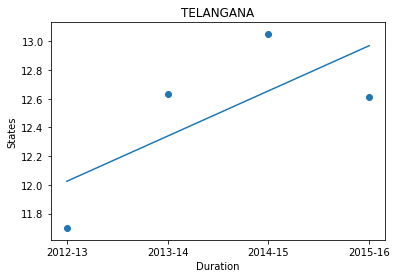

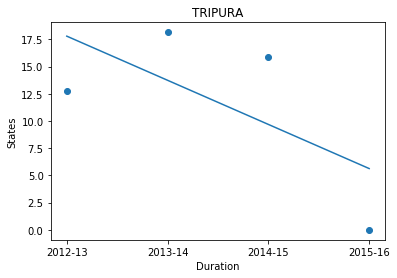

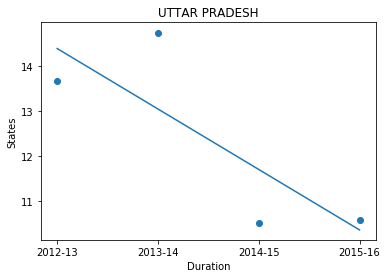

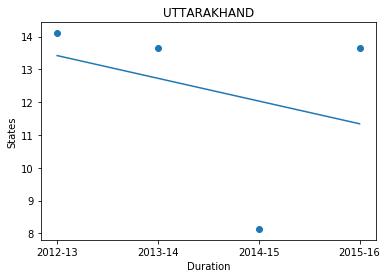

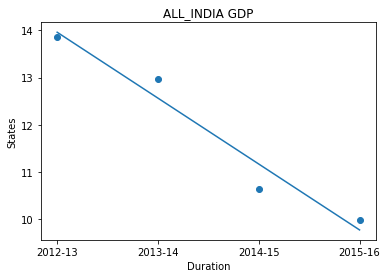

In [6]:
#looping for plotting all the states

#iterating over the list 
for i in statescol[2:]:  
    f = plt.figure()   #initiating figure
    #Computing m and c
    m,c = np.polyfit(data1_a.index[5::], data1_a[i][5::],1)
    
    #plotting the %growth of state yearly
    plt.scatter(x = data1_a['Duration'][5::], y = data1_a[i][5::])
    #plotting best fit line using y=m*x+c
    plt.plot(data1_a['Duration'][5::],m*data1_a.index[5::]+c)
    
    plt.xlabel("Duration")
    plt.ylabel("States")
    plt.title(i.upper(), loc = 'center')

#### Computing average for comaprison

In [7]:
meandf = data1_a.iloc[5:,2:]   #creating new dataframe to find mean

In [8]:
meanr= pd.DataFrame(meandf.mean(axis=0).sort_values(ascending=False))  #finding the mean and sorting
meanr.columns=['mean']
meanr.T

,Madhya Pradesh,Karnataka,Arunachal Pradesh,Bihar,Chhattisgarh,Haryana,Gujarat,Kerala,Tamil Nadu,Mizoram,...,Jammu & Kashmir,Odisha,Sikkim,Himachal Pradesh,Maharashtra,Rajasthan,Manipur,Punjab,Meghalaya,Goa
mean,14.6475,14.23,14.1625,13.765,13.3525,13.0425,12.7675,12.7525,12.7125,12.65,...,11.0025,10.7125,10.4925,9.6125,9.0775,8.955,8.9175,8.51,7.6675,2.02


One way to compare the growth rates of states is by taking their average grwth rate. 
From the above plot we can see that Andhra Pradesh is growing consistently fast wheres as Gujarat is struggling with low growth rate.

Madhya Pradesh, Karnataka and Arunachal Pradesh are the top 3 fastest growing states. Goa, Meghalaya and Pumjab are the 3 slowest growing states.

Nation's growth is 11.86.

Average growth rate of Kerala (my home state) is 12.75. Comparing it to the Nation's growth rate Kerala's growth rate is slightly higher than that of Nation's.

### GDP of the states for the year 2015-16

In [9]:
states= data1_a.iloc[4:5,2:-1].astype('int64')  #creating new dataframe for year 2015-16
states = states.T    
states.columns = ['GSDP']
states.T

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand
GSDP,609934,18784,224234,413503,260776,45002,994316,485184,0,118387,...,0,341887,0,0,16637,1212668,575631,0,1153795,184091


#### Plotting GDP of all states for 2015-16

Text(0.5, 1.0, 'GDP OF EACH STATES')

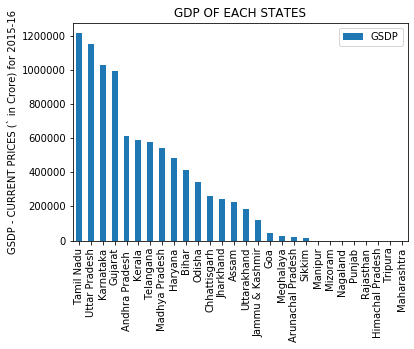

In [10]:
states = states.sort_values(by='GSDP', ascending=False)
states.plot.bar()
plt.ylabel("GSDP - CURRENT PRICES (` in Crore) for 2015-16")
plt.title("GDP OF EACH STATES")

A bar plot is used for analysisng GDP of the states for the year 2015-16. With barplot, the GDP of different states can be visualised easily and can be compared. 

From the plot we can see Tamil Nadu, Uttarpradesh and Karnataka have higher GDP whereas Sikkhim, Madhya Pradesh, Meghalaya and Goa have lower GDP and many states like Manipur, Punjab, Tripura whose GDPs are unknown.


#### Total GDP

In [12]:
GDP = data1_a.iloc[0:5,2:-1].astype('int64')    #creating new dataframe for GDP
GDP

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand
0,379402,11063,143175,247144,158074,42367,615606,297539,72720,78254,...,11839,227872,266628,436465,11165,751485,359433,19208,724049,115523
1,411404,12547,156864,282368,177511,38120,724495,347032,82820,87105,...,13619,258275,297734,494004,12338,855481,401493,21663,822903,131835
2,464272,14602,177745,317101,206690,35921,807623,400662,94764,95893,...,16612,291709,334714,549701,13862,971090,452186,25593,944146,149817
3,526468,16761,198098,373920,234982,40633,895027,437462,104369,100404,...,18414,321971,368011,612194,15209,1092564,511178,29667,1043371,161985
4,609934,18784,224234,413503,260776,45002,994316,485184,0,118387,...,0,341887,0,0,16637,1212668,575631,0,1153795,184091


In [13]:
pd.DataFrame(GDP.sum(axis=0, skipna=True)).sort_values(by=0, ascending=False).T

,Maharashtra,Tamil Nadu,Uttar Pradesh,Karnataka,Gujarat,Andhra Pradesh,Kerala,Telangana,Madhya Pradesh,Rajasthan,...,Jammu & Kashmir,Himachal Pradesh,Goa,Meghalaya,Tripura,Arunachal Pradesh,Sikkim,Manipur,Nagaland,Mizoram
0,6161061,4883288,4688264,4062220,4037067,2391480,2355741,2299921,2160179,2092364,...,480043,354673,202043,115881,96131,73757,69211,60904,60484,37473


From total GDP of each states for 2011-16 Maharashtra, TamilNadu, Uttar Pradesh, Karnataka and Gujarat are the top 5 states and Arunachal Pradesh, Sikkhim, Manipur, Nagaland and Mizoram are the bottom 5 states based on total GDP.

States like Andhra Pradesh and Karnataka are doing consistently good throughtout the period which means they growing at faster rate than others. Manipur has been doing bad both in GDP and growth rate. Goa is growing at a smaller rate than any other states.


## PART 1-B

In [14]:
path = r"D:\Data science\GDP Assgmnt\Part1B"   #reading the path

In [15]:
all_files = glob.glob(path + '/*.csv')    #getting all the files

#### Concatenating all the files

In [16]:
li = []
for location in all_files:       #taking each file in all_files
    df_b = pd.read_csv(location, index_col=None, header=0, encoding = 'cp1252')
    df_b = df_b[['Item','2014-15']]  #filtering column to required ones only
    df_b = df_b.set_index('Item')   #setting index as item
    df_b = df_b.T
    df_b.loc[:,'State'] = location.split('\\')[-1].split('.')[0].split('-')[1]     #creating a new column called States
    li.append(df_b)

In [17]:
li

[Item     Agriculture, forestry and fishing    Crops  Livestock  \
 2014-15                           14819416  7893514    4309078   
 
 Item     Forestry and logging  Fishing and aquaculture  Mining and quarrying  \
 2014-15                346160                  2270664               1484300   
 
 Item      Primary  Manufacturing  \
 2014-15  16303716        4672266   
 
 Item     Electricity, gas, water supply & other utility services  \
 2014-15                                            1151729         
 
 Item     Construction  ...  Public administration  Other services  Tertiary  \
 2014-15       4664889  ...                2200897         4215389  22032942   
 
 Item     TOTAL GSVA at basic prices  Taxes on Products  Subsidies on products  \
 2014-15                    48825542            5512100                1690800   
 
 Item     Gross State Domestic Product  Population ('00)  \
 2014-15                      52646842            501510   
 
 Item     Per Capita GSDP (Rs.)   

In [18]:
data1_b = pd.concat(li, axis=0, ignore_index=True, sort=False) #concatnating all the files
data1_b = data1_b.set_index("State")
data1_b = data1_b.drop(['Chandigarh','Delhi','Puducherry'])   #deleting Union Territories
data1_b = data1_b.replace(np.nan,0)  #replacing NA with 0
data1_b.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*
State,,,,,,,,,,,,,,,,,,,,,
Andhra_Pradesh,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,48825542.0,5512100.0,1690800.0,52646842.0,501510.0,104977.0,0.0,0.0,0.0,0.0
Arunachal_Pradesh,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,1636292.0,70099.0,30272.0,1676119.0,14870.0,112718.0,0.0,0.0,0.0,0.0
Assam,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,...,18666897.0,1725309.0,582406.0,19809800.0,326780.0,60621.0,0.0,0.0,0.0,0.0
Bihar,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,...,36184863.0,3213546.0,2006421.0,37391988.0,1101240.0,33954.0,0.0,0.0,0.0,0.0
Chhattisgarh,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,...,22228481.0,2601791.0,1332092.0,23498180.0,270530.0,86860.0,0.0,0.0,0.0,0.0


1. Top 5 and the bottom 5 states based on the GDP per capita.
1. Ratio of the highest per capita GDP to the lowest per capita GDP.

#### Per capita of all states

Text(0.5, 1.0, 'PER CAPITA GDP FOR ALL THE STATES')

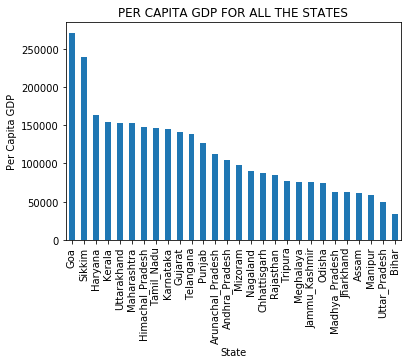

In [19]:
#sorting and plotting
data1_b.sort_values(by='Per Capita GSDP (Rs.)', ascending=False).plot.bar(y='Per Capita GSDP (Rs.)', legend= False)

plt.ylabel("Per Capita GDP")
plt.title("PER CAPITA GDP FOR ALL THE STATES")

In [20]:
#top and bottom 5 states based on GDP per capita
print("Top 5 states based on the GDP per capita are\n", data1_b.nlargest(5,["Per Capita GSDP (Rs.)"]))
print("Bottom 5 states based on the GDP per capita are\n", data1_b.nsmallest(5,["Per Capita GSDP (Rs.)"]))

Top 5 states based on the GDP per capita are
              Agriculture, forestry and fishing      Crops  Livestock  \
State                                                                  
Goa                                   308507.0   140421.0    30141.0   
Sikkim                                137447.0   114976.0    17338.0   
Haryana                              8015238.0  4636731.0  2916173.0   
Kerala                               5930617.0  3070386.0  1656104.0   
Uttarakhand                          1601423.0   866146.0   391188.0   

             Forestry and logging  Fishing and aquaculture  \
State                                                        
Goa                       15744.0                 122201.0   
Sikkim                     4529.0                    604.0   
Haryana                  352254.0                 110080.0   
Kerala                   499808.0                 704319.0   
Uttarakhand              339293.0                   4796.0   

             M

In [21]:
print('Ratio of the highest per capita GDP to the lowest per capita GDP is ', 271793.0/62091.0)

Ratio of the highest per capita GDP to the lowest per capita GDP is  4.377333268911759


#### Percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states

In [22]:
data1_b['%primary contribution'] = (data1_b['Primary']/data1_b['Gross State Domestic Product'])*100

In [23]:
data1_b['%secondary contribution'] = (data1_b['Secondary']/data1_b['Gross State Domestic Product'])*100

In [24]:
data1_b['%teritiary contribution'] = (data1_b['Tertiary']/data1_b['Gross State Domestic Product'])*100

In [25]:
data1_b.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*,%primary contribution,%secondary contribution,%teritiary contribution
State,,,,,,,,,,,,,,,,,,,,,
Andhra_Pradesh,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,52646842.0,501510.0,104977.0,0.0,0.0,0.0,0.0,30.968080,19.923102,41.850453
Arunachal_Pradesh,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,1676119.0,14870.0,112718.0,0.0,0.0,0.0,0.0,42.774946,17.152064,37.696846
Assam,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,...,19809800.0,326780.0,60621.0,0.0,0.0,0.0,0.0,26.889201,20.359070,46.982347
Bihar,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,...,37391988.0,1101240.0,33954.0,0.0,0.0,0.0,0.0,21.448437,16.005825,59.317437
Chhattisgarh,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,...,23498180.0,270530.0,86860.0,0.0,0.0,0.0,0.0,27.239629,35.061805,32.295173


Text(0.5, 1.0, '% CONTRIBUTION OF EACH SECTOR')

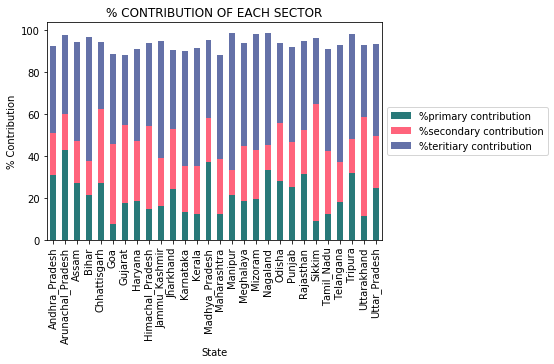

In [26]:
colors = ["#287979","#FF647C","#6471A8"]

#plotting the %contribution of each sector for all states
data1_b.loc[:,['%primary contribution','%secondary contribution', '%teritiary contribution']].plot.bar(stacked=True, color=colors)

plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel("% Contribution")
plt.title('% CONTRIBUTION OF EACH SECTOR')

Here, a stacked bar graph is used to plot the %contribution each sector for each states. Since we needed to plot the contribution of primary, secondary and teritiary sector as a percentage of the total GDP for all states stacked bar is useful as it shows how a larger category is divided into smaller categories and what the relationship of each part has on the total amount.



#### Percentile of the state and %contribution of primary sector to total GDP

In [27]:
data1_b['Percentile rank'] = data1_b['Gross State Domestic Product'].rank().astype('int64')
data1_b.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Population ('00),Per Capita GSDP (Rs.),Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*,%primary contribution,%secondary contribution,%teritiary contribution,Percentile rank
State,,,,,,,,,,,,,,,,,,,,,
Andhra_Pradesh,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,501510.0,104977.0,0.0,0.0,0.0,0.0,30.968080,19.923102,41.850453,22
Arunachal_Pradesh,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,14870.0,112718.0,0.0,0.0,0.0,0.0,42.774946,17.152064,37.696846,3
Assam,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,...,326780.0,60621.0,0.0,0.0,0.0,0.0,26.889201,20.359070,46.982347,12
Bihar,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,...,1101240.0,33954.0,0.0,0.0,0.0,0.0,21.448437,16.005825,59.317437,17
Chhattisgarh,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,...,270530.0,86860.0,0.0,0.0,0.0,0.0,27.239629,35.061805,32.295173,14


In [28]:
#create a new dataframe with percentile rank
corrdf = data1_b[['Percentile rank','%primary contribution']].sort_values(by='Percentile rank')

In [29]:
#finding the correlation between percentile rank
#and prinmary contribution
corrm = corrdf.corr().round(decimals=3)
corrm.style.background_gradient(cmap='Greys')

,Percentile rank,%primary contribution
Percentile rank,1,-0.124
%primary contribution,-0.124,1


The correlation between percentile rank of a state and percentage of primary sector contribution is negative which shows that as percentile rank increases the percentage of primary sector contribution to the total GDP decreases and vice versa.

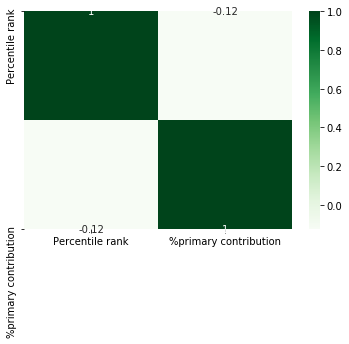

In [34]:
sns.heatmap(corrm, cmap='Greens', annot=True)

#### Categorising into C1, C2, C3 and C4

In [35]:
#finding and assigning quantile of GDP per capita for states
x = data1_b['Per Capita GSDP (Rs.)'].quantile(.20)
y = data1_b['Per Capita GSDP (Rs.)'].quantile(.50)
z = data1_b['Per Capita GSDP (Rs.)'].quantile(.85)
m = data1_b['Per Capita GSDP (Rs.)'].quantile(1)

In [36]:
#Categorising the states based on the quantile of GDP for all states
Tag_list = []
for i in data1_b['Per Capita GSDP (Rs.)']:
    if i<=m and i>z:   #for 1>i>0.85
        Tag_list.append('C1')
    elif i<=z and i>y: #for 0.85>i>0.50
        Tag_list.append('C2')
    elif i<=y and i>x: #for 0.50>i>0.20
        Tag_list.append('C3')
    else:              #for i<0.20
        Tag_list.append('C4')

In [37]:
data1_b['Tag'] = Tag_list

In [38]:
#Creating new df of categorised states
States_cat = data1_b[['Tag','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product']]

In [39]:
#Grouping 
Subsector = States_cat.groupby('Tag')

In [40]:
#Finding the sum of sub-sectors
sum_of_subsectors = Subsector.sum()
sum_of_subsectors

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
Tag,,,,,,,,,,,,
C1,15993232.0,833510.0,19625045.0,2434878.0,12607184.0,15738265.0,7885253.0,4321519.0,15571552.0,4150701.0,9042352.0,118129206.0
C2,88427015.0,11613097.0,108002544.0,14541227.0,43975718.0,63729156.0,37760099.0,37812475.0,95695548.0,20189303.0,39486616.0,622828765.0
C3,28994177.0,9385092.0,18259272.0,4050466.0,11828535.0,13901840.0,7867052.0,4239374.0,13158791.0,7076156.0,9546854.0,135359991.0
C4,56735044.0,6096419.0,24987032.0,4310264.0,22775948.0,27484595.0,16191800.0,7684498.0,24177534.0,13486630.0,15859015.0,233252066.0


In [41]:
sum_of_subsectors1 = sum_of_subsectors.loc[:,'Agriculture, forestry and fishing':'Other services'].div(sum_of_subsectors['Gross State Domestic Product'],axis=0)*100
sum_of_subsectors1 = sum_of_subsectors1.T
sum_of_subsectors1.head()

Tag,C1,C2,C3,C4
"Agriculture, forestry and fishing",13.538762,14.197645,21.420049,24.323490
Mining and quarrying,0.705592,1.864573,6.933431,2.613661
Manufacturing,16.613203,17.340648,13.489416,10.712459
"Electricity, gas, water supply & other utility services",2.061199,2.334707,2.992366,1.847900
Construction,10.672368,7.060643,8.738575,9.764521


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

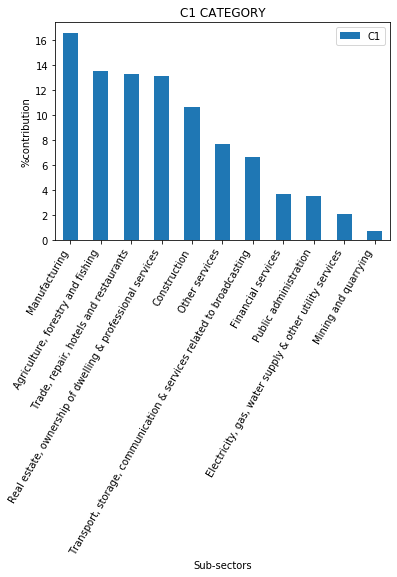

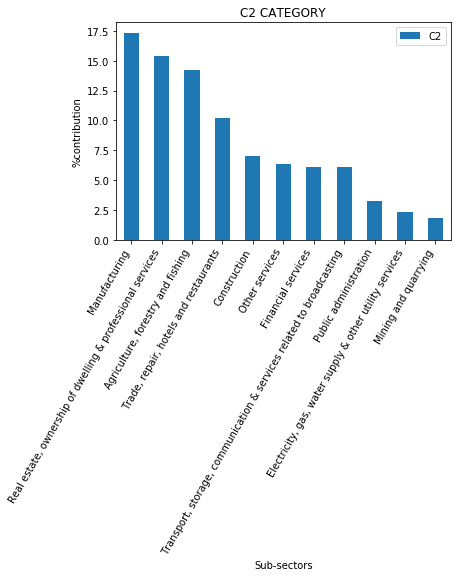

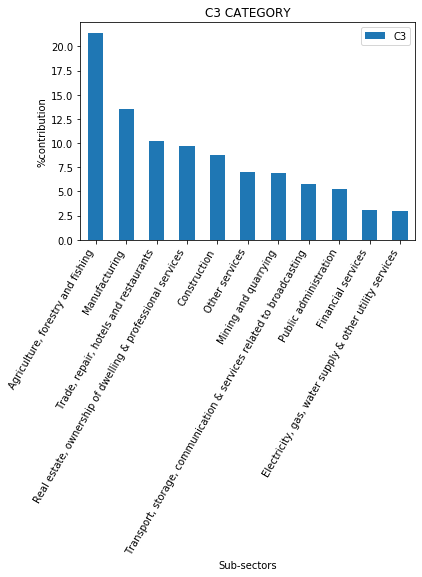

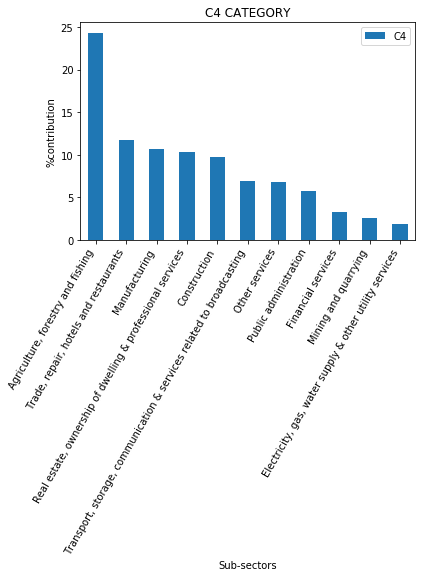

In [42]:
sum_of_subsectors1.sort_values(by='C1', ascending=False, axis=0).plot(kind='bar', y = 'C1')
plt.ylabel('%contribution')
plt.xlabel('Sub-sectors')
plt.title('C1 CATEGORY')
plt.xticks(rotation=60, horizontalalignment='right')

sum_of_subsectors1.sort_values(by='C2', ascending=False, axis=0).plot(kind='bar', y = 'C2')
plt.ylabel('%contribution')
plt.xlabel('Sub-sectors')
plt.title('C2 CATEGORY')
plt.xticks(rotation=60, horizontalalignment='right')

sum_of_subsectors1.sort_values(by='C3', ascending=False, axis=0).plot(kind='bar', y = 'C3')
plt.ylabel('%contribution')
plt.xlabel('Sub-sectors')
plt.title('C3 CATEGORY')
plt.xticks(rotation=60, horizontalalignment='right')

sum_of_subsectors1.sort_values(by='C4', ascending=False, axis=0).plot(kind='bar', y = 'C4')
plt.ylabel('%contribution')
plt.xlabel('Sub-sectors')
plt.title('C4 CATEGORY')
plt.xticks(rotation=60, horizontalalignment='right')

# PART-II: GDP and EDUCATION DROPOUT RATES

In [43]:
import os
path2 = r'D:\Data science\GDP Assgmnt\Part2'
os.chdir(path2)
data2 = pd.read_csv('rs_session243_au570_1.1.csv', usecols=['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2013-2014'])
data2.head()

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2013-2014
0,A & N Islands,1.21,1.69,7.20
1,Andhra Pradesh,4.35,5.20,12.65
2,Arunachal Pradesh,10.89,6.71,14.49
3,Assam,7.44,10.51,30.43
4,Bihar,2.09,4.08,25.33


In [44]:
#Cleaning the dataset
data2 = data2.dropna(axis=0, thresh = data2.shape[1]/2)
data2 = data2.fillna(0)

In [45]:
data2_merge = pd.merge(data2, data1_b, right_on='State', left_on='Level of Education - State')
data2_merge = data2_merge[["Level of Education - State","Primary - 2014-2015","Upper Primary - 2014-2015","Secondary - 2013-2014","%primary contribution","%secondary contribution","%teritiary contribution","Population ('00)"]]
data2_merge.head()

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2013-2014,%primary contribution,%secondary contribution,%teritiary contribution,Population ('00)
0,Assam,7.44,10.51,30.43,26.889201,20.359070,46.982347,326780.0
1,Bihar,2.09,4.08,25.33,21.448437,16.005825,59.317437,1101240.0
2,Goa,0.20,0.07,9.58,7.681649,38.085628,42.778382,14950.0
3,Gujarat,0.76,6.41,21.61,17.750506,36.896684,33.764756,633590.0
4,Haryana,0.41,5.81,12.51,18.379705,28.714286,43.950252,266620.0


#### Correlation plot between primary dropout rate and %contribution of each sectors

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

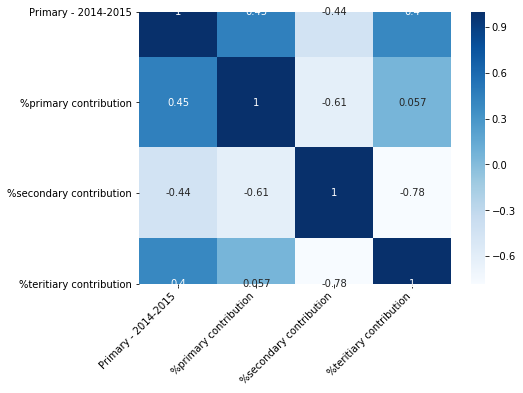

In [46]:
plt.figure(figsize=(7,5))
corprim = data2_merge[['Primary - 2014-2015','%primary contribution','%secondary contribution','%teritiary contribution']].corr()
sns.heatmap(corprim, annot=True, cmap='Blues')  #.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xticks(rotation=45, horizontalalignment='right')

#### Correlation plot between upper primary drpout rate and %contribution of each sectors

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

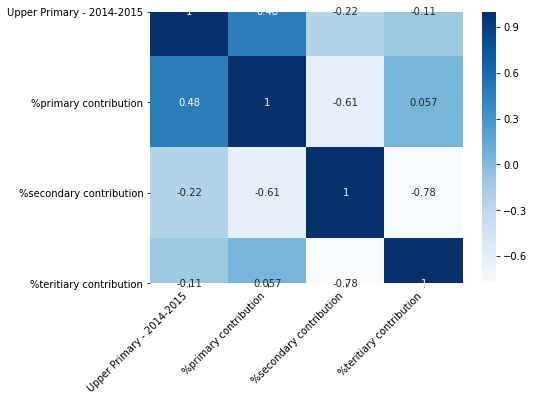

In [47]:
plt.figure(figsize=(7,5))
corup = data2_merge[['Upper Primary - 2014-2015','%primary contribution','%secondary contribution','%teritiary contribution']].corr()
sns.heatmap(corup, annot=True, cmap='Blues')  #.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xticks(rotation=45, horizontalalignment='right')

#### Correlation plot between secondary dropout rate and %contribution of each sectors

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

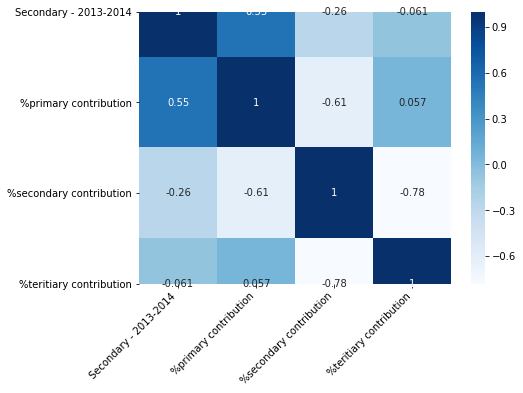

In [48]:
plt.figure(figsize=(7,5))
corsec = data2_merge[['Secondary - 2013-2014','%primary contribution','%secondary contribution','%teritiary contribution']].corr()
sns.heatmap(corsec, annot=True, cmap='Blues')  #.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xticks(rotation=45, horizontalalignment='right')

#### Correlation plot between population and dropout rates

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

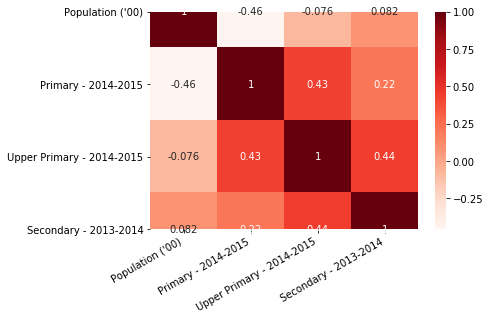

In [49]:
corpop = data2_merge[["Population ('00)","Primary - 2014-2015","Upper Primary - 2014-2015","Secondary - 2013-2014"]].corr()
sns.heatmap(corpop, annot=True, cmap='Reds')
plt.xticks(rotation=30, horizontalalignment='right')

The correlation between dropout rates and population is weak. The dropout does not depend much on population. There are also negative correlation which shows the dropout rate decreases as population increases and vice versa.

#### The trend in the each education level 

Text(0.5, 1.0, 'SECONDARY EDUCATION LEVEL')

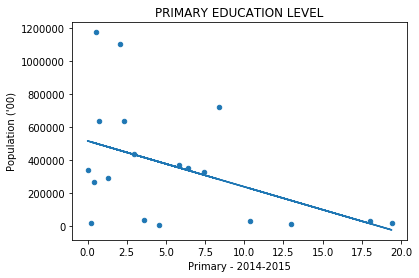

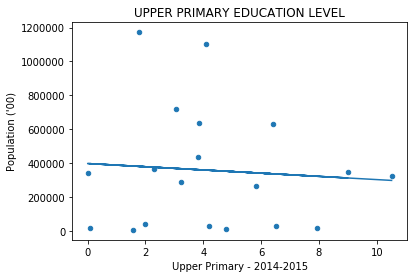

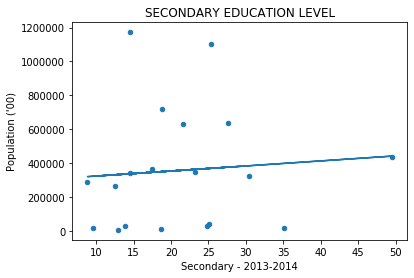

In [50]:
data2_merge.plot.scatter(x="Primary - 2014-2015", y="Population ('00)")
z = np.polyfit(data2_merge["Primary - 2014-2015"], data2_merge["Population ('00)"],1)
p = np.poly1d(z)
plt.plot(data2_merge["Primary - 2014-2015"], p(data2_merge["Primary - 2014-2015"]))
plt.title('PRIMARY EDUCATION LEVEL')

data2_merge.plot.scatter(x="Upper Primary - 2014-2015", y="Population ('00)")
z = np.polyfit(data2_merge["Upper Primary - 2014-2015"], data2_merge["Population ('00)"],1)
p = np.poly1d(z)
plt.plot(data2_merge["Upper Primary - 2014-2015"], p(data2_merge["Upper Primary - 2014-2015"]))
plt.title('UPPER PRIMARY EDUCATION LEVEL')

data2_merge.plot.scatter(x="Secondary - 2013-2014", y="Population ('00)")
z = np.polyfit(data2_merge["Secondary - 2013-2014"], data2_merge["Population ('00)"],1)
p = np.poly1d(z)
plt.plot(data2_merge["Secondary - 2013-2014"], p(data2_merge["Secondary - 2013-2014"]))
plt.title('SECONDARY EDUCATION LEVEL')

There is a negative trend in primary and upper primary dropout rate whereas secondary dropout rate has a negative trend.